# Sarcasm Detection

In [107]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [109]:
!python -m nltk.downloader all
import nltk

/usr/lib/python3.6/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /roo

### Load Data (5 Marks)

In [110]:
path_to_zip_file='/content/drive/MyDrive/glove.6B.zip'
import zipfile
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall()

### Get length of each headline and add a column for that (5 Marks)

In [111]:
path_to_json_file='/content/drive/MyDrive/Sarcasm_Headlines_Dataset.json'
geeky_file = open(path_to_json_file, 'rt')
lines = geeky_file.read().split('\n')
articles_list=[]
headers=['Article_Link','Headline','Length of Headline','Is_Sarcastic']
for i in range(0,len(lines)):
  temp=lines[i]
  # print(i)
  # print(temp)
  if len(temp)==0:
    continue
  else:
    article_link=temp.split('",')[0].replace("{",'').split(':',1)[1].strip()
    # print(article_link)
    headline=temp.split('",')[1].replace('"','').split(':',1)[1].strip()
    # print(headline)
    is_sarcastic=temp.split('",')[2].replace("}",'').split(':',1)[1].strip()
    # print(is_sarcastic)
    articles_list.append([article_link,headline,len(headline),is_sarcastic])

In [112]:
articles=pd.DataFrame(articles_list,columns=headers)

In [113]:
articles

,Article_Link,Headline,Length of Headline,Is_Sarcastic
0,"""https://www.huffingtonpost.com/entry/versace-...",former versace store clerk sues over secret 'b...,78,0
1,"""https://www.huffingtonpost.com/entry/roseanne...",the 'roseanne' revival catches up to our thorn...,84,0
2,"""https://local.theonion.com/mom-starting-to-fe...",mom starting to fear son's web series closest ...,79,1
3,"""https://politics.theonion.com/boehner-just-wa...","boehner just wants wife to listen, not come up...",84,1
4,"""https://www.huffingtonpost.com/entry/jk-rowli...",j.k. rowling wishes snape happy birthday in th...,64,0
...,...,...,...,...
26704,"""https://www.huffingtonpost.com/entry/american...",american politics in moral free-fall,36,0
26705,"""https://www.huffingtonpost.com/entry/americas...",america's best 20 hikes,23,0
26706,"""https://www.huffingtonpost.com/entry/reparati...",reparations and obama,21,0
26707,"""https://www.huffingtonpost.com/entry/israeli-...",israeli ban targeting boycott supporters raise...,60,0


In [114]:
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(articles)

,Total,Percent
Is_Sarcastic,0,0.0
Length of Headline,0,0.0
Headline,0,0.0
Article_Link,0,0.0


### Drop `article_link` from dataset (5 Marks)

In [115]:
articles.drop(['Article_Link'],inplace=True,axis=1)

In [116]:
cleaned_articles=[]
import re
def clean_text(text):
    text = text.lower()
    
    pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    text = pattern.sub('', text)
    text = " ".join(filter(lambda x:x[0]!='@', text.split()))
    emoji = re.compile("["
                           u"\U0001F600-\U0001FFFF"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    
    text = emoji.sub(r'', text)
    text = text.lower()
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)        
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text) 
    text = re.sub(r"\'ll", " will", text)  
    text = re.sub(r"\'ve", " have", text)  
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"don't", "do not", text)
    text = re.sub(r"did't", "did not", text)
    text = re.sub(r"can't", "can not", text)
    text = re.sub(r"it's", "it is", text)
    text = re.sub(r"couldn't", "could not", text)
    text = re.sub(r"have't", "have not", text)
    text = re.sub(r"[,.\"\'!@#$%^&*(){}?/;`~:<>+=-]", "", text)
    return text
for i in range(0,len(articles)):
  cleaned_articles.append(clean_text(articles['Headline'][i]))

In [117]:
articles['Clean Headline']=cleaned_articles

In [118]:
# import string
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords

# def CleanTokenize(df):
#     head_lines = list()
#     lines = df["headline"].values.tolist()

#     for line in lines:
#         line = clean_text(line)
#         # tokenize the text
#         tokens = word_tokenize(line)
#         # remove puntuations
#         table = str.maketrans('', '', string.punctuation)
#         stripped = [w.translate(table) for w in tokens]
#         # remove non alphabetic characters
#         words = [word for word in stripped if word.isalpha()]
#         stop_words = set(stopwords.words("english"))
#         # remove stop words
#         words = [w for w in words if not w in stop_words]
#         head_lines.append(words)
#     return [" ".join(head_lines[i]) for i in range(0,len(head_lines))]

# head_lines = CleanTokenize(pd.DataFrame(cleaned_articles,columns=['headline']))

In [119]:
# articles['Clean Headline']=head_lines

### Initialize parameter values
- Set values for max_features, maxlen, & embedding_size
- max_features: Number of words to take from tokenizer(most frequent words)
- maxlen: Maximum length of each sentence to be limited to 25
- embedding_size: size of embedding vector

In [120]:
max_features = 10000
max_len = 15
embedding_size = 200

### Apply `tensorflow.keras` Tokenizer and get indices for words (5 Marks)
- Initialize Tokenizer object with number of words as 10000
- Fit the tokenizer object on headline column
- Convert the text to sequence


In [121]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer=Tokenizer(num_words=max_features,oov_token='<OOV>')
tokenizer.fit_on_texts(articles['Clean Headline'])
headline_sequence=tokenizer.texts_to_sequences(articles['Clean Headline'])

In [122]:
headline_sequence[6]

[4, 6835, 333, 6, 520, 1, 1564]

### Pad sequences (5 Marks)
- Pad each example with a maximum length
- Convert target column into numpy array

In [123]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_headline_sequence = pad_sequences(maxlen=max_len, sequences=headline_sequence, padding="post", value=0)

In [124]:
padded_headline_sequence[6]

array([   4, 6835,  333,    6,  520,    1, 1564,    0,    0,    0,    0,
          0,    0,    0,    0], dtype=int32)

### Vocab mapping
- There is no word for 0th index

In [125]:
word_number_mapping=tokenizer.word_index
number_word_mapping = dict([(value, key) for key, value in word_number_mapping.items()])

In [126]:
# Missing Word Tokeinizing.......
word_number_mapping['<OOV>']

1

### Set number of words
- Since the above 0th index doesn't have a word, add 1 to the length of the vocabulary

In [127]:
num_words = len(tokenizer.word_index) + 1
print(num_words)

28546


### Load Glove Word Embeddings (5 Marks)

In [128]:
import numpy as np

def loadGloveModel(File):
    print("Loading Glove Model")
    f = open(File,'r')
    gloveModel = {}
    for line in f:
        splitLines = line.split()
        word = splitLines[0]
        wordEmbedding = np.array([float(value) for value in splitLines[1:]])
        gloveModel[word] = wordEmbedding
    print(len(gloveModel)," words loaded!")
    return gloveModel

# model_50=loadGloveModel('/content/glove.6B.50d.txt')
# model_100=loadGloveModel('/content/glove.6B.100d.txt')
model_200=loadGloveModel('/content/glove.6B.200d.txt')
# model_300=loadGloveModel('/content/glove.6B.300d.txt')

Loading Glove Model
400000  words loaded!


In [129]:
# EMBEDDING_FILE = '/content/glove.6B.200d.txt'
# embeddings = {}
# for o in open(EMBEDDING_FILE):
#     word = o.split(" ")[0]
#     # print(word)
#     embd = o.split(" ")[1:]
#     embd = np.asarray(embd, dtype='float32')
#     # print(embd)
#     embeddings[word] = embd

### Create embedding matrix

In [130]:
# create a weight matrix for words in training docs
# Using the 200 dimesnsional glove embeddings.....
embedding_matrix = np.zeros((num_words, 200))
for word, i in tokenizer.word_index.items():
	embedding_vector = model_200.get(word)
	if embedding_vector is not None:
		embedding_matrix[i] = embedding_vector

In [131]:
embedding_matrix.shape

(28546, 200)

In [132]:
# Using heading words and creating dataset using GLOVE embeddings:
# (Elimates the embedding layer in the model as all the embeddings are fed into model directly)

In [133]:
# final_x_dataset=np.zeros(shape=(len(padded_headline_sequence),(max_len),embedding_size))
# for i in range(0,len(padded_headline_sequence)):
#   headline_embedding=np.zeros(shape=(max_len,embedding_size))
#   for j in range(0,len(padded_headline_sequence[i])):
#     word_embedding_vector=np.zeros(embedding_size)
#     if padded_headline_sequence[i][j] in number_word_mapping.keys():
#       word_embedding_vector=model_200.get(number_word_mapping[padded_headline_sequence[i][j]])
#     else:
#       continue
#     headline_embedding[j]=word_embedding_vector
#   final_x_dataset[i] =headline_embedding

In [134]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# scalers = {}
# for i in range(final_x_dataset.shape[1]):
#     scalers[i] = StandardScaler()
#     final_x_dataset[:, i, :] = scalers[i].fit_transform(final_x_dataset[:, i, :]) 

In [135]:
# from sklearn.model_selection import train_test_split
# final_y_dataset=np.array([int(i) for i in articles['Is_Sarcastic'].values])
# x_train,x_test,y_train,y_test=train_test_split(final_x_dataset,final_y_dataset,random_state=0)

In [136]:
from sklearn.model_selection import train_test_split
final_y_dataset=np.array([int(i) for i in articles['Is_Sarcastic'].values])
x_train,x_test,y_train,y_test=train_test_split(padded_headline_sequence,final_y_dataset,random_state=0)

In [137]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((20031, 15), (6678, 15), (20031,), (6678,))

### Define model (10 Marks)
- Hint: Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, flatten it, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.

In [138]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Input, Flatten, BatchNormalization
from tensorflow.keras import initializers


In [146]:
model=Sequential()
# input_layer = Input(shape=(max_len,embedding_size)) # Input layer
# model.add(input_layer)
embedding_layer=Embedding(num_words,output_dim=embedding_size, weights=[embedding_matrix], input_length=max_len,trainable=False)
model.add(embedding_layer)
lstm_layer=Bidirectional(LSTM(units=200, return_sequences=True, recurrent_dropout=0.5,kernel_initializer='he_normal'))
model.add(lstm_layer)
lstm_layer=Bidirectional(LSTM(units=100, return_sequences=True, recurrent_dropout=0.5,kernel_initializer='he_normal'))
model.add(lstm_layer)
model.add(TimeDistributed(Dense(100, activation="tanh")))
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(units=1024,activation='relu',use_bias=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(units=256,activation='relu',use_bias=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(units=64,activation='relu',use_bias=True))
model.add(BatchNormalization())
model.add(Dropout(0.3))
output_layer=Dense(units=1,activation='sigmoid',use_bias=True)
model.add(output_layer)

In [147]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 15, 200)           5709200   
_________________________________________________________________
bidirectional_14 (Bidirectio (None, 15, 400)           641600    
_________________________________________________________________
bidirectional_15 (Bidirectio (None, 15, 200)           400800    
_________________________________________________________________
time_distributed_7 (TimeDist (None, 15, 100)           20100     
_________________________________________________________________
flatten_7 (Flatten)          (None, 1500)              0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 1500)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 1024)             

### Compile the model (5 Marks)

In [148]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD
ad = Adam(lr=1e-5, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
sgd= SGD(learning_rate=0.01, momentum=0.6, nesterov=True, name="SGD")
model.compile(optimizer=ad, loss="binary_crossentropy", metrics=["accuracy"])

In [149]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("model-{val_loss:.2f}.h5", monitor="val_loss", verbose=1, save_best_only=True, save_weights_only=True)
stop = EarlyStopping(monitor="val_loss", patience=5)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.001, patience=5, min_lr=1e-20, verbose=1)
callbacks=[checkpoint,stop,reduce_lr]

### Fit the model (5 Marks)

In [150]:
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), batch_size=200, epochs=100, verbose=1,callbacks=callbacks)

Epoch 1/100
101/101 [==============================] - ETA: 0s - loss: 0.9191 - accuracy: 0.5263
Epoch 00001: val_loss improved from inf to 0.69052, saving model to model-0.69.h5
101/101 [==============================] - 86s 854ms/step - loss: 0.9191 - accuracy: 0.5263 - val_loss: 0.6905 - val_accuracy: 0.5229
Epoch 2/100
101/101 [==============================] - ETA: 0s - loss: 0.8612 - accuracy: 0.5548
Epoch 00002: val_loss improved from 0.69052 to 0.68136, saving model to model-0.68.h5
101/101 [==============================] - 85s 838ms/step - loss: 0.8612 - accuracy: 0.5548 - val_loss: 0.6814 - val_accuracy: 0.5562
Epoch 3/100
101/101 [==============================] - ETA: 0s - loss: 0.8234 - accuracy: 0.5832
Epoch 00003: val_loss improved from 0.68136 to 0.66346, saving model to model-0.66.h5
101/101 [==============================] - 85s 837ms/step - loss: 0.8234 - accuracy: 0.5832 - val_loss: 0.6635 - val_accuracy: 0.6027
Epoch 4/100
101/101 [==============================] 

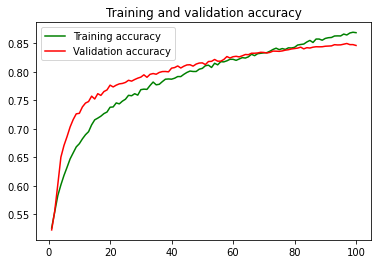

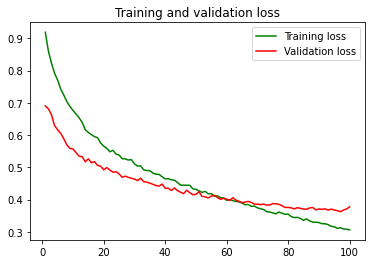

In [151]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [152]:
# def predict_sarcasm(s):
#     x_final = pd.DataFrame({"headline":[s]})
#     test_lines = CleanTokenize(x_final)
#     test_sequences = tokenizer_obj.texts_to_sequences(test_lines)
#     test_review_pad = pad_sequences(test_sequences, maxlen=max_length, padding='post')
#     pred = model.predict(test_review_pad)
#     pred*=100
#     if pred[0][0]>=50: return "It's a sarcasm!" 
#     else: return "It's not a sarcasm."

In [166]:
predictions=model.predict(x_test)

In [202]:
# predict_sarcasm(x_test[0])
index=2
sent=[]
for i in x_test[index]:
  if i==0:
    continue
  else:
    sent.append(number_word_mapping[i])
print(" ".join(sent))
print('Prediction value:',predictions[index][0])
print('Actual value:',y_test[index])

woman unaware she is only person on acid at james taylor concert
Prediction value: 0.94152427
Actual value: 1
